
![Titanic](https://hsto.org/files/fb4/856/19f/fb485619f6a24cd791db6792433c1bf0.jpeg)
# Titanic. Extrayendo información de la catástrofe marítima

### Init scripts

In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Ignore warnings when displaying
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(font_scale=1.5)  # crazy big


### Data description

In [4]:
# Load titanic & test csv files as a pandas DataFrame
titanic_df = titanic = pd.read_csv("data/train.csv")
test_df    = pd.read_csv("data/test.csv")

# Preview the first few rows
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.describe(percentiles=[])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


======================================================================================================

### Preprocesado

In [7]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [8]:
titanic["class"] = titanic.Pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["Age", "Sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.Survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.Parch + titanic.SibSp).astype(bool)
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

## Factores

### Sexo

In [9]:
pal = sns.color_palette()

(0, 1)

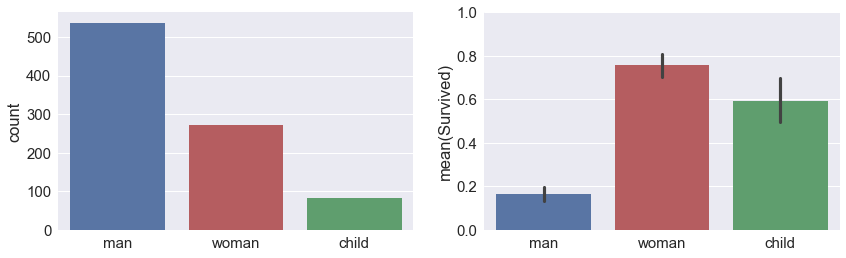

In [10]:
colors = [pal[0], pal[2], pal[1]]
who_order = ['man', 'woman', 'child']
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x="who", data=titanic, palette=colors, order=who_order)
plt.xlabel("")
plt.subplot(1,2,2)
sns.barplot(x="who", y='Survived', data=titanic, palette=colors, order=who_order)
plt.xlabel("")
plt.ylim(0,1)

### Clase

(0, 1)

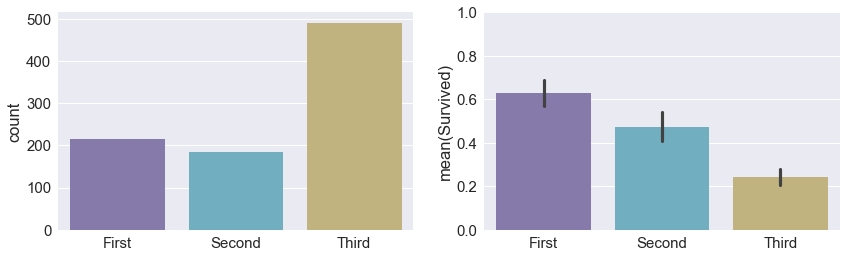

In [11]:
class_colors = [pal[3], pal[5], pal[4]]
class_order=['First', 'Second', 'Third']

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x="class", data=titanic, order=class_order, palette=class_colors)
plt.xlabel("")
plt.subplot(1,2,2)
sns.barplot(x="class", y='Survived', data=titanic, order=class_order, palette=class_colors)
plt.xlabel("")
plt.ylim(0,1)

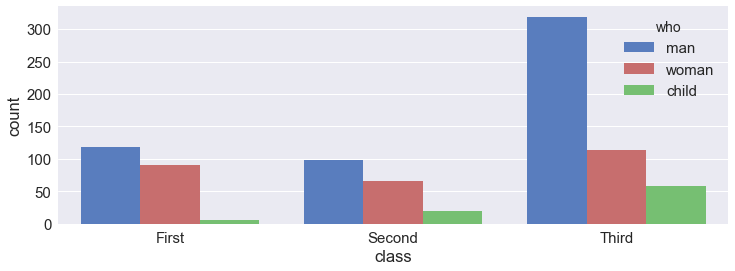

In [12]:
pal = sns.color_palette('muted')
colors = [pal[0], pal[2], pal[1]]
plt.figure(figsize=(12,4))
sns.countplot(x="class", hue="who", data=titanic, order=class_order, palette=colors)

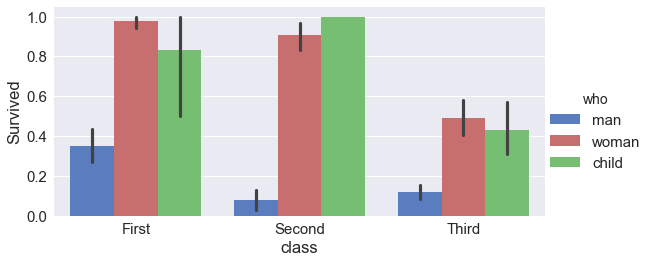

In [13]:
sns.factorplot(x="class", y="Survived", hue="who", data=titanic,
                   size=4, kind="bar", palette=colors, order=class_order, hue_order=who_order, aspect=2 )


### Cubierta y Puerto

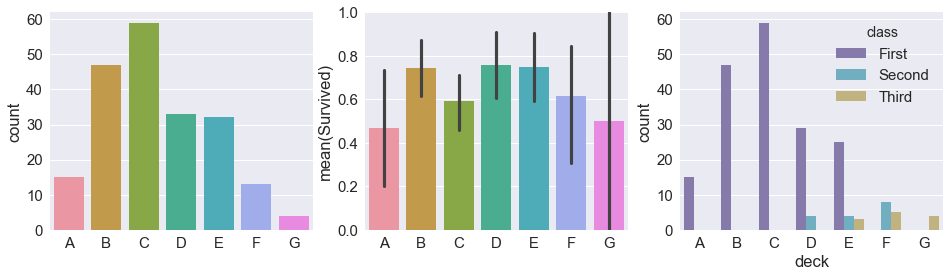

In [14]:
plt.figure(figsize=(16,4))
deck_order="ABCDEFG"
plt.subplot(1,3,1)
sns.countplot(x="deck", data=titanic, order=deck_order)
plt.xlabel("")
plt.subplot(1,3,2)
sns.barplot(x="deck", y='Survived', data=titanic, order=deck_order)
plt.xlabel("")
plt.ylim(0,1)
plt.subplot(1,3,3)
sns.countplot("deck", hue="class", data=titanic, palette=class_colors, order=deck_order, hue_order=class_order);

(0, 1)

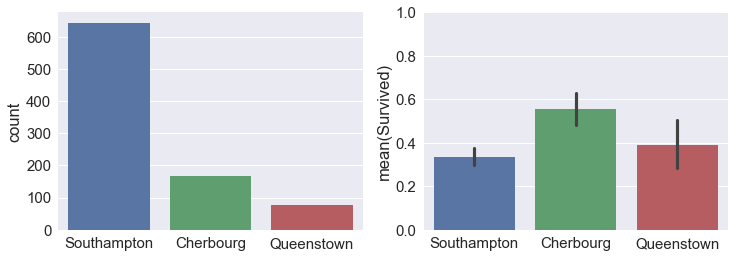

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x="embark_town", data=titanic)
plt.xlabel("")
plt.subplot(1,2,2)
sns.barplot(x="embark_town", y='Survived', data=titanic)
plt.xlabel("")
plt.ylim(0,1)

### Edad

In [16]:
sns.set(font_scale=1)  # crazy big


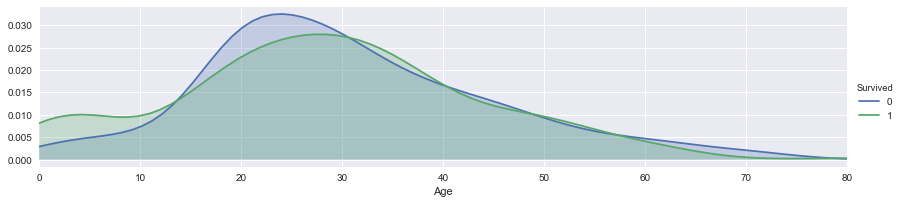

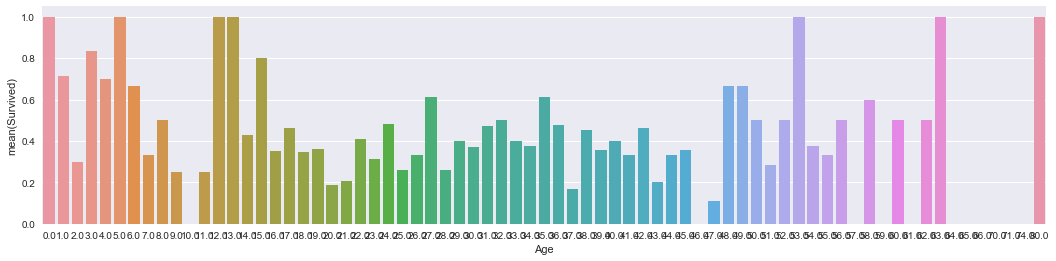

In [17]:
# convert from float to int

titanic_df['Age'] = titanic_df['Age'].dropna().astype(int)
test_df['Age']    = test_df['Age'].dropna().astype(int)

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)


In [18]:
## Factores artificiales

In [19]:
### Viaja solo

In [20]:
### Es hombre adulto

In [21]:
### Fare

In [22]:
train = pd.read_csv("data/train.csv")

In [23]:
def harmonize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()
    
    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
    
    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

In [24]:
train_data = harmonize_data(train)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg    = LogisticRegression(random_state=1, C=10)
scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=5
)

alg.fit(train_data[predictors],train_data["Survived"])

print(scores.mean())

# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(alg.coef_[0])

# preview
coeff_df

0.791285228281


,Features,Coefficient Estimate
0,Survived,-1.104897
1,Pclass,2.701496
2,Name,-0.038775
3,Sex,-0.327084
4,Age,-0.084281
5,SibSp,0.002369
6,Parch,0.243445
7,Ticket,NaN
8,Fare,NaN
9,Cabin,NaN


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = RandomForestClassifier(
    random_state=1,
    n_estimators=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=6
)

scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=5
)

alg.fit(train_data[predictors],train_data["Survived"])

print(scores.mean())

0.822765159212
